# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 2</span>

### Exercise 02.1
Calcolare il seguente integrale tramite metodi Monte Carlo
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

**Metodo della media**

Per prima cosa usiamo il metodo della media per calcolare il valore di questo integrale. Esso consiste nel calcolare $$I \simeq \frac{1}{N} \sum_{i=0}^{N} \frac{\pi}{2}\cos(\frac{\pi}{2}x_{i}),$$ dove le $x_{i}$ sono estratte in maniera uniforme dall'intervallo di integrazione. L'errore viene valutato statisticamente tramite data blocking.

**Importance Sampling (IS)**

Consideriamo ora un metodo alternativo. Supponiamo di avere:
$$I = \int_{a}^{b}f(x) = \int_{a}^{b}g(x)p(x)\,dx$$ 
dove $g(x) = \frac{f(x)}{p(x)}$ e $p(x)$ è una distribuzione di probabilità.
In questo caso è possibile calcolare l'integrale con la stessa formula usata per il metodo della media, dove la funzione da valutare all'interno della sommatoria è $g(x)$ e  l'intervallo viene campionato secondo la distribuzione $p(x)$. A seconda della scelta della $p(x)$ sarà possibile approssimare meglio o peggio il valore dell'integrale che vogliamo calcolare; chiaramente, la sceltà migliore sarà quella distribuzione che più approssima la forma di $f(x)$. 

#### Algoritmo

Per fare l'esercizio 1 nel primo punto sono stati generati $10^{5}$ punti distribuiti su $150$ blocchi. In ogni punto è stata valutata la funzione. Sono stati sommati tutti i valori e poi divisi per il numero totale di punti su cui è avvenuto il campionamento, ovvero si è fatta una media.

Per quanto riguarda, invece, la distribuzione non uniforme, tramite tecnica di rigetto sono stati campionati punti secondo $p(x) = \frac{3}{2} \left (1 - x^{2} \right)$. La funzione valutata e poi mediata sul numero di punti generati risulta essere: $g(x) = \frac{\pi}{3} cos(\frac{\pi}{2}x)\frac{1}{1-x^{2}}$

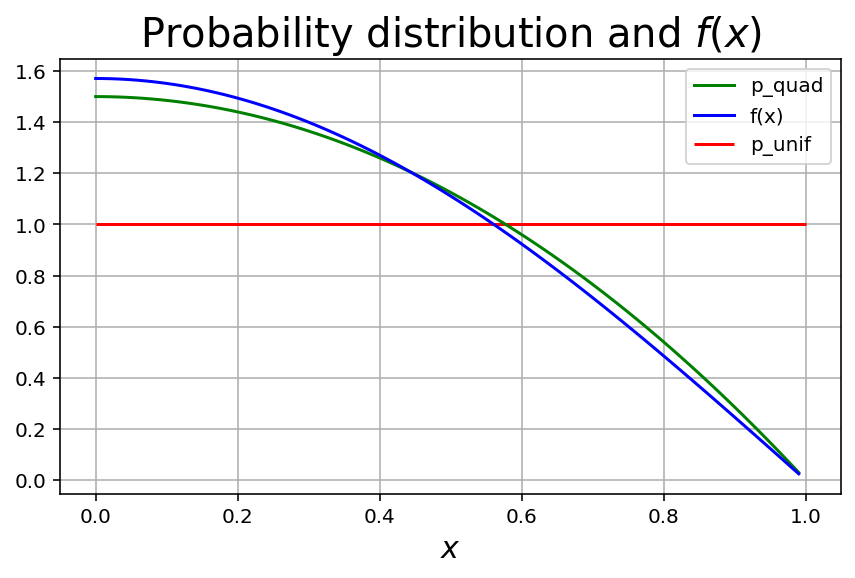

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math as mat
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format='retina'

x = np.arange(0,1,0.01)
y = mat.pi/2. * np.cos(mat.pi/2. * x)
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(x, 3./2.*(1-x**2), color='green', label='p_quad')
ax.hlines(1, 0,1, color='red', label='p_unif')
ax.plot(x,y, label = 'f(x)', color='blue')
ax.set_title('Probability distribution and $f(x)$', size=20)
ax.set_xlabel('$x$', size = 15)
ax.legend()
ax.grid()

Text(0.5, 1.0, 'Importance sampling')

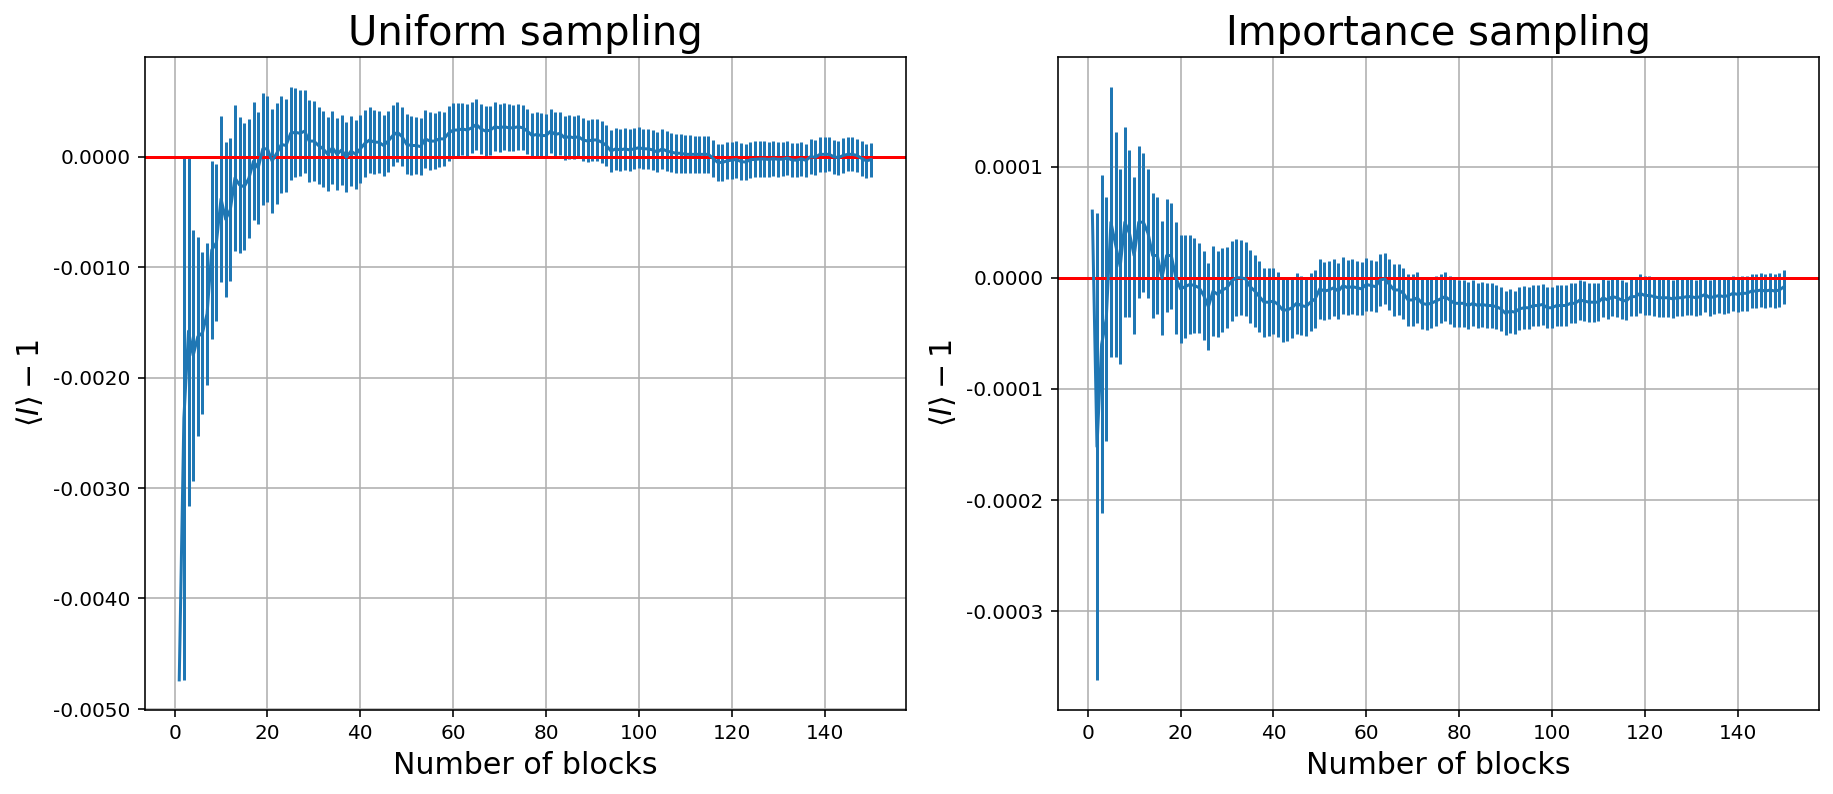

In [6]:
data = pd.read_csv("Esercizio_2/Data/integrale_media.csv", header = None)
data_uniform = pd.DataFrame(data)
data = pd.read_csv("Esercizio_2/Data/integrale_quad.csv", header = None)
data_quad = pd.DataFrame(data)

x = [data_uniform[0], data_quad[0]]
y = [data_uniform[1], data_quad[1]]
y_err = [data_uniform[2], data_quad[2]]

fig, ax = plt.subplots(1,2,figsize=(15,6))
ax = ax.reshape(-1)
for i in range(2):
    ax[i].errorbar(x[i],y[i]-1, yerr=y_err[i])
    ax[i].axhline(0, color = 'red')
    ax[i].set_xlabel('Number of blocks', size=15)
    ax[i].set_ylabel(r'$\langle I \rangle - 1$', size=15)
    ax[i].grid()
    ax[i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))
ax[0].set_title('Uniform sampling', size=20)
ax[1].set_title('Importance sampling', size=20)

Per confrontare la velocità di convergenza dei due metodi presentiamo di seguito la sovrapposizione dei due andamenti della media progressiva.

Text(0.5, 1.0, 'Uniform and importance sampling - Confrontation')

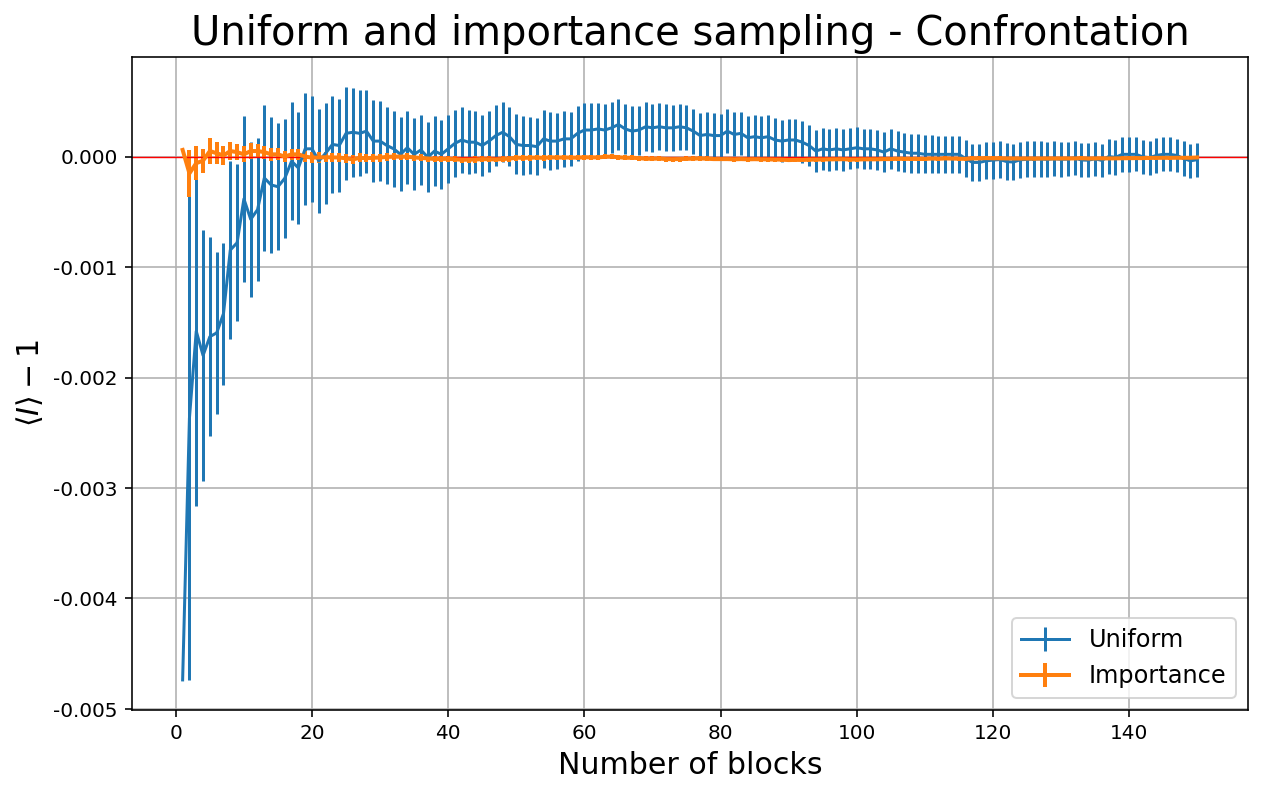

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
ax.axhline(0, color = 'red', linewidth=0.7)
ax.errorbar(x[0],y[0]-1, yerr=y_err[0], label='Uniform')
ax.errorbar(x[1],y[1]-1, yerr=y_err[1], label='Importance', linewidth=2)
ax.grid()
ax.legend(loc = 'lower right', fontsize=12)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax.set_xlabel('Number of blocks', size=15)
ax.set_ylabel(r'$\langle I \rangle - 1$', size=15)
ax.set_title('Uniform and importance sampling - Confrontation', size=20)

Come si può osservare, il calcolo tramite *importance sampling* converge al valore vero. dell'integrale più rapidamente e più precisamente del campionamento uniforme.

### Esercizio 02.2

In questo esercizio simuleremo un *Random Walk (RW)* sia nel caso discreto all'interno di un reticolo cubico, sia nel caso continuo. Presentaremo poi l'andamento della radice della distanza quadratica media in funzione del numero di passi compiuti. Verificheremo che, come previsto dalla teoria,
$$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} \propto N$$

#### Reticolo cubico

Per la simulazione del *RW* sul reticolo cubico si è costruito un array [x,y,z], inizializzato nell'origine [0,0,0]. Per ogni step viene scelto in maniera casuale uno degli indici e, ancora in maniera casuale, viene sommato $\pm 1$. Questo processo è implementato dalla funzione ***RW(N)***, dove $N$ è il numero di passi totali da compiere. Per ogni $N \in [1,100]$ si procede nel seguente modo:
- vengono simulati $10^{4}$ *RW*,
- tramite data blocking, da $100$ blocchi viene estratto $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ e la sua incertezza statistica.

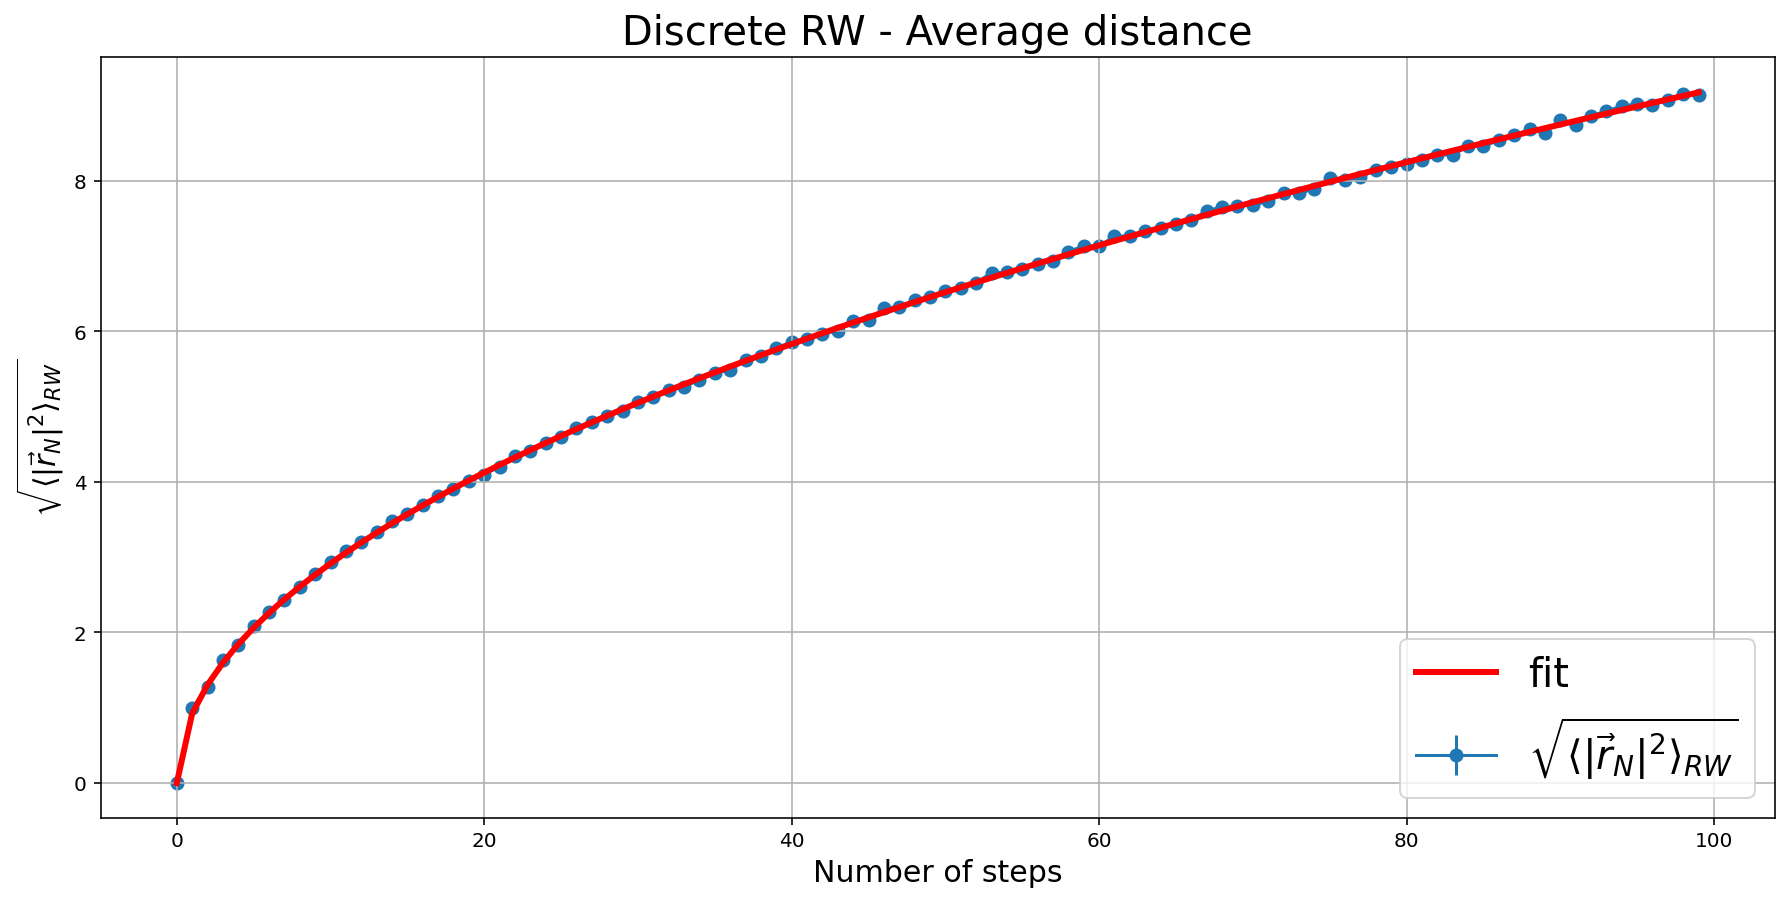

Parametro fit: k = 0.9223 ± 0.0004


In [7]:
def f(x,k):
    return k*x**0.5

data = pd.read_csv("Esercizio_2/Data/cubic_lattice.csv", header=None)
data_lattice = pd.DataFrame(data)

k, p_cov= curve_fit(f,data_lattice[0],data_lattice[1])

fig, ax = plt.subplots(figsize=(15,7))

ax.errorbar(data_lattice[0], data_lattice[1], yerr = data_lattice[2], marker = "o",zorder=1, 
           label = r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax.plot(data_lattice[0],f(data_lattice[0],*k), color = 'red', zorder=2, linewidth=3, 
        label = 'fit')
ax.set_xlabel('Number of steps', size=15)
ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', size=15)
ax.set_title('Discrete RW - Average distance', size=20)
ax.legend(loc = 'lower right', fontsize=20)
ax.grid()
plt.show()

print("Parametro fit: k =", '{0:.4f}'.format(k[0]), u"\u00B1", '{0:.4f}'.format(np.sqrt(np.diagonal(p_cov))[0]))

L'andamento osservato è compatibile con quello previsto dalla teoria: infatti la curva ottenuta è stata fittata con una radice quadrata. Dato che l'incertezza statistica non è osservabile in questo grafico, presentiamo di seguito la differenza tra i valori ottenuti dal fit e dalla simulazione. Come si vede, le differenze oscillano attorno al valore nullo e, nella maggior parte dei casi, l'errore statistico rende la misura ottenuta compatibile con $0$.

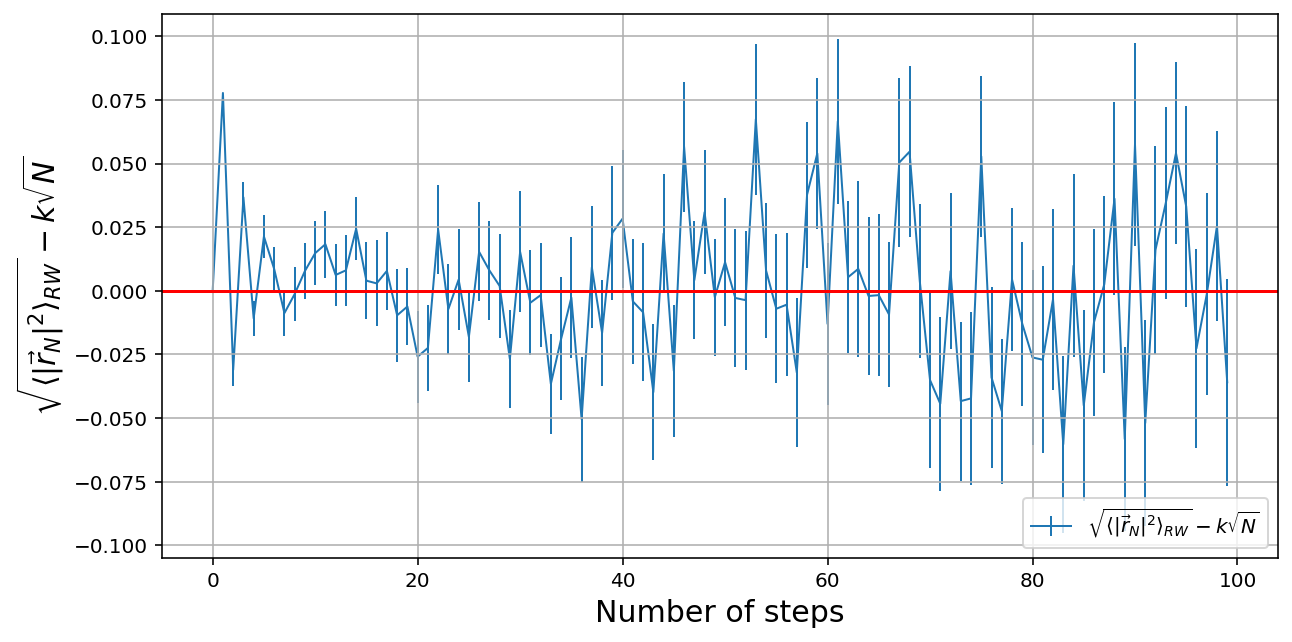

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

ax.errorbar(data_lattice[0], data_lattice[1] - f(data_lattice[0],*k), yerr=data_lattice[2],  
            zorder=1, label = r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - k\sqrt{N}$',
           linewidth=1)
ax.axhline(0, color='red')
ax.set_xlabel('Number of steps', size=15)
ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - k\sqrt{N}$', size=15)
ax.legend(loc = 'lower right', fontsize=10)
ax.grid()
plt.show()

#### RW continuo

Per la simulazione del *RW* nel caso continuo viene fissato il passo $r_{0} = 1$. Vengono poi estratti in maniera uniforme $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$. Vengon calcolati $\Delta x$, $\Delta y$ e $\Delta z$ sfruttando la relazione tra le coordinate sferiche e cartesiane. Infine vengono sommati di volta in volta queste componenti alla posizione di partenza posta in $[0,0,0]$ si è costruito un array [x,y,z], inizializzato nell'origine [0,0,0]. Per ogni step viene. Questo procedimento è stato implementato nella funzione *RW_continuum(N)*. Come già fatto per il caso precedente, per ogni $N \in [1,100]$ si procede nel seguente modo:
- vengono simulati $10^{4}$ *RW*,
- tramite data blocking, da $100$ blocchi viene estratto $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ e la sua incertezza statistica,

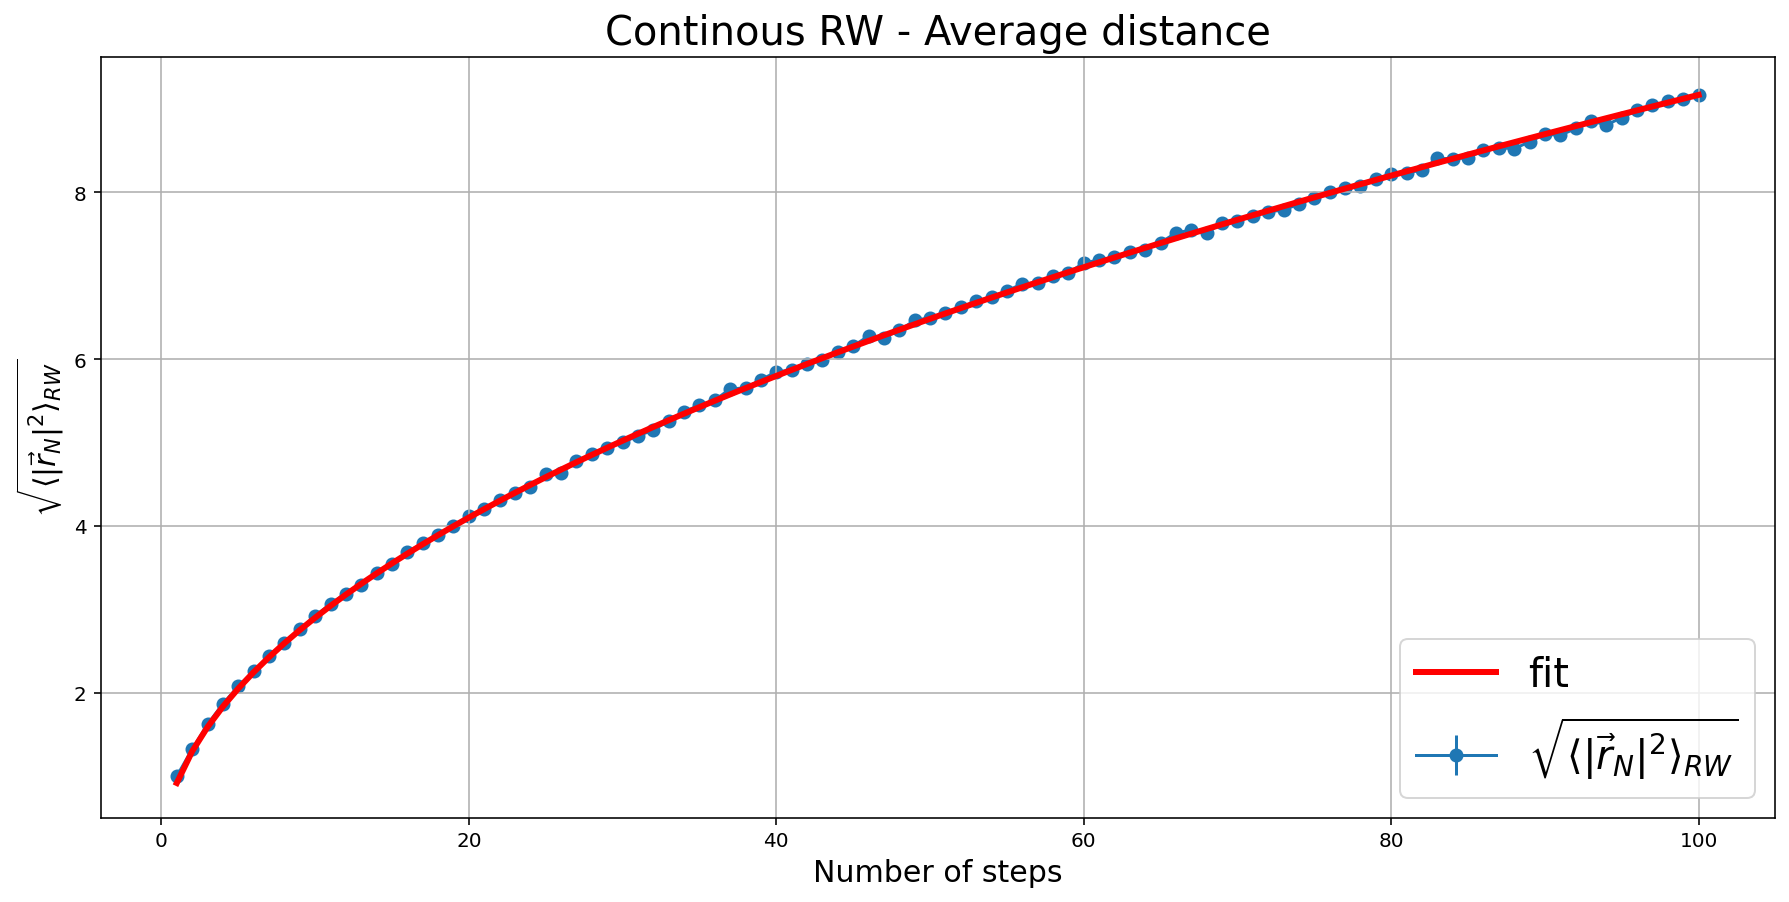

Parametro fit: k = 0.9170 ± 0.0004


In [10]:
data = pd.read_csv("Esercizio_2/Data/continous_lattice.csv", header=None)
data_lattice = pd.DataFrame(data)

k, p_cov= curve_fit(f,data_lattice[0],data_lattice[1])

fig, ax = plt.subplots(figsize=(15,7))

ax.errorbar(data_lattice[0], data_lattice[1], yerr = data_lattice[2], marker = "o",zorder=1, 
           label = r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax.plot(data_lattice[0],f(data_lattice[0],*k), color = 'red', zorder=2, linewidth=3, 
        label = 'fit')
ax.set_xlabel('Number of steps', size=15)
ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', size=15)
ax.set_title('Continous RW - Average distance', size=20)
ax.legend(loc = 'lower right', fontsize=20)
ax.grid()
plt.show()

print("Parametro fit: k =", '{0:.4f}'.format(k[0]), u"\u00B1", '{0:.4f}'.format(np.sqrt(np.diagonal(p_cov))[0]))

Ancora una volta, l'andamento osservato sembra rispecchiare quello previsto dalla teoria. Anche in questo caso presentiamo di seguito la differenza tra i valori ottenuti dal fit e dalla simulazione dove è possibile osservare che, nella quasi totalità dei casi, curva del fit e curva misurata sono compatibili.

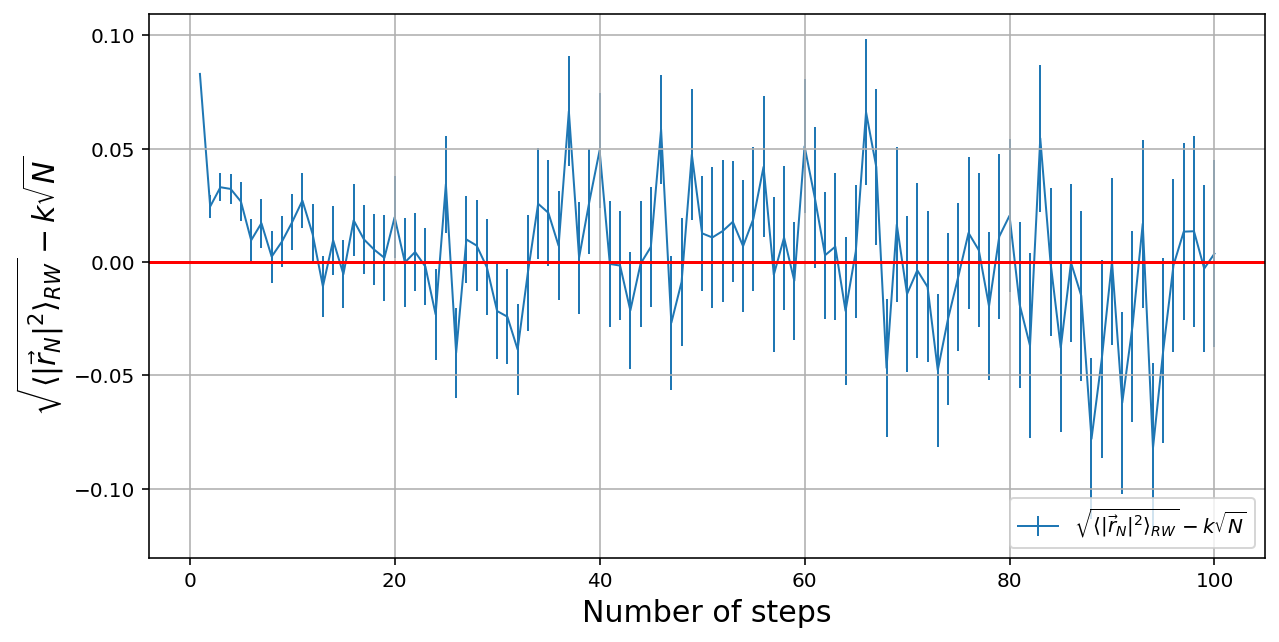

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.errorbar(data_lattice[0], data_lattice[1] - f(data_lattice[0],*k), yerr=data_lattice[2],  
            zorder=1, label = r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - k\sqrt{N}$',
           linewidth=1)
ax.axhline(0, color='red')
ax.set_xlabel('Number of steps', size=15)
ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - k\sqrt{N}$', size=15)
ax.legend(loc = 'lower right', fontsize=10)
ax.grid()
plt.show()

#### Conclusione

Abbiamo osservato, a conclusione di questo esercizio sul *RW*, la seguente legge di proporzionalità:
$$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} \propto N$$

Questo legame tra la distanza quadratica media e il numero di passi è tipico di sistemi che rispondono all'equazione di diffusione. Presa infatti un sistema per il quale è definita una densità $\rho(x,t)$, si parla di processo diffusivo se questa densità soddisfa la seguente equazione:
$$\frac{\partial \rho}{\partial t} = D \frac{\partial^{2} \rho}{\partial x^{2}}$$

Tale equazione può essere ricavata a partire dall'ipotesi che le componenti del sistema si muovano seguendo dei *RW*.